# Initialization 

In [22]:
import math 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

## Data Generation  

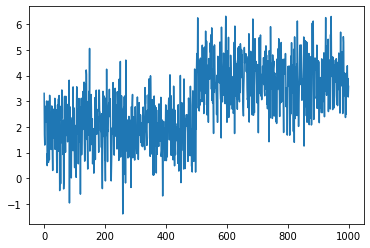

In [23]:
N = 1000
Xtrain_1 = 2 + np.random.randn(N, 1)
ytrain_1 = np.zeros((N, 1))
Xtrain_2 = 4 + np.random.randn(N, 1)
ytrain_2 = np.ones((N, 1))
X_train = np.vstack((Xtrain_1, Xtrain_2))
y_train = np.vstack((ytrain_1, ytrain_2))

Xtest_1 = 2 + np.random.randn(int(N/2), 1)
ytest_1 = np.zeros((int(N/2), 1))
Xtest_2 = 4 + np.random.randn(int(N/2), 1)
ytest_2 = np.ones((int(N/2), 1))

X_test = np.vstack((Xtest_1, Xtest_2))
y_test = np.vstack((ytest_1, ytest_2))
plt.plot(X_test)

In [27]:
def mean(X):
    return sum(X)/float(len(X))

# m = np.mean(X)
def stdv(X):
    avg = mean(X)
    variance = sum([(x - avg)**2 for x in X])/float(len(X) - 1)
    return math.sqrt(variance)
# std = np.std(X)

In [25]:
print(mean(Xtrain_1), np.mean(Xtrain_1))

[2.02986971] 2.029869711913443


In [28]:
print(stdv(Xtrain_1), np.std(Xtrain_1))

1.014845129016441 1.014845129016441


## Calculate the probability for each class

In [29]:
def calculate_probability(x, mean, stdev, prior):
    exponent = math.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return prior*(1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

## Classification

In [30]:
m1 = mean(Xtrain_1)
m2 = mean(Xtrain_2)
s1 = stdv(Xtrain_1)
s2 = stdv(Xtrain_2)
p = 0.5
label = []
for item in range(len(X_test)):
    p1 = calculate_probability(X_test[item],m1, s1, p)
    p2 = calculate_probability(X_test[item], m2, s2, 1-p)
    if p1 > p2:
        label.append(0)
    else:
        label.append(1)

In [32]:
# 2 * confusion_matrix(y_test, np.array(label))/len(y_test)
confusion_matrix(y_test, np.array(label))

array([[434,  66],
       [ 96, 404]], dtype=int64)

In [33]:
accuracy_score(y_test, np.array(label))

0.838

In [34]:
precision_score(y_test, np.array(label))

0.8595744680851064

In [35]:
0.814/(0.814 + 0.144)

0.8496868475991649

In [36]:
recall_score(y_test, np.array(label))

0.808

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

C:\Users\DaBigM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [39]:
y_pre = gnb.predict(X_test)

In [40]:
# 2 * confusion_matrix(y_test, y_pre)/len(y_test)
confusion_matrix(y_test, y_pre)

array([[434,  66],
       [ 96, 404]], dtype=int64)